### **6: Random Forests**
- **Author**  : Sumashree Javaji
- **Dataset** : fundamentals.csv - contains annual SEC 10K fillings (2012-2016)

#### **Data Exploration**
- Import data to a pandas dataframe
- Import necessary packages - Pandas , os
- Get high level overview of the data
- Check for null values & proceed with handling na's

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Importing os library to change my current working directory to a new folder created for homework 1
import os
os.chdir('/Users/sumashreejavaji/PycharmProjects/BAX_452_Machine Learning/HW_1') # setting cwd to a new path
os.getcwd() # checking my environment's current working directory

'/Users/sumashreejavaji/PycharmProjects/BAX_452_Machine Learning/HW_1'

In [3]:
SEC_df = pd.read_csv("fundamentals.csv") # Loads data from flat files to a pandas dataframe
SEC_df.head() # prints the first 5 rows of the dataset to get a macro leve overview

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
# Checking for the null values in all the columns and printing only the columns with nulls ordered by desc null count 
null_info = pd.DataFrame({'Column': SEC_df.isnull().sum().index, 'Null Count': SEC_df.isnull().sum().values}).sort_values(by='Null Count' , ascending=False)
null_info['Null Percentage'] = (null_info['Null Count'] / len(SEC_df)) * 100
print(null_info[null_info['Null Count'] > 0])

                          Column  Null Count  Null Percentage
61                   Quick Ratio         299        16.788321
9                     Cash Ratio         299        16.788321
14                 Current Ratio         299        16.788321
78  Estimated Shares Outstanding         219        12.296463
77            Earnings Per Share         219        12.296463
76                      For Year         173         9.713644


In [5]:
SEC_df.shape

(1781, 79)

In [6]:
SEC_df =SEC_df.dropna()
SEC_df.shape 

(1299, 79)

In [7]:
# Load the data and drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year', unnamed
SEC_df.drop(SEC_df.columns[:3], axis=1, inplace=True)
SEC_df = SEC_df.drop(columns=[ 'For Year']) 
SEC_df.rename(columns=lambda x: x.replace('.', '').replace(',', '').replace(' ', '_').replace('/', '_').replace('&', '_').replace('-', '_'), inplace=True) # fixing the column names to support performing python 
SEC_df.columns

Index(['Accounts_Payable', 'Accounts_Receivable', 'Add'l_income_expense_items',
       'After_Tax_ROE', 'Capital_Expenditures', 'Capital_Surplus',
       'Cash_Ratio', 'Cash_and_Cash_Equivalents', 'Changes_in_Inventories',
       'Common_Stocks', 'Cost_of_Revenue', 'Current_Ratio',
       'Deferred_Asset_Charges', 'Deferred_Liability_Charges', 'Depreciation',
       'Earnings_Before_Interest_and_Tax', 'Earnings_Before_Tax',
       'Effect_of_Exchange_Rate',
       'Equity_Earnings_Loss_Unconsolidated_Subsidiary', 'Fixed_Assets',
       'Goodwill', 'Gross_Margin', 'Gross_Profit', 'Income_Tax',
       'Intangible_Assets', 'Interest_Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long_Term_Debt', 'Long_Term_Investments',
       'Minority_Interest', 'Misc_Stocks', 'Net_Borrowings', 'Net_Cash_Flow',
       'Net_Cash_Flow_Operating', 'Net_Cash_Flows_Financing',
       'Net_Cash_Flows_Investing', 'Net_Income', 'Net_Income_Adjustments',
       'Net_Income_Applicable_to_Common_Shar

#### **Random Forest & Evaluation**
- Split data set with 70% train and 30% test then build random forest model
- Default every (hyper-)parameter
- Compute MSE - `MSE` is average squared deviation between the predicted values and the corresponding actual values. The squaring operation amplifies the significance of larger errors.

In [8]:
from sklearn.model_selection import train_test_split

#Split the data into testing and training data
X = SEC_df.drop(['Estimated_Shares_Outstanding'], axis=1)
y = SEC_df['Estimated_Shares_Outstanding']

# train, test = train_test_split(SEC_df, train_size=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((909, 74), (390, 74))

#### **Hyper-parameter Tuning**
- `n_estimators` is the number of decision trees in the forest.
- The final prediction is determined by averaging the predictions of all the trees
- By default n_estimators is set to 100

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error
import numpy as np

mse, r_squared, rmse, mae  = {}, {}, {}, {}

for i in range(80, 201,20):
    name = f'regr_{i}'
    regr = RandomForestRegressor(n_estimators = i, random_state=142)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    mse[name] = mean_squared_error(y_test, y_pred)
    r_squared[name] = regr.score(X_test, y_test)
    rmse[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    mae[name] = mean_absolute_error(y_test, y_pred)

In [10]:
for i in mse :
    print(i, mse[i])

regr_80 8.354716490587645e+16
regr_100 8.3153922787852e+16
regr_120 8.77765199761569e+16
regr_140 8.481785883139997e+16
regr_160 8.191818361526686e+16
regr_180 8.188769649094358e+16
regr_200 8.379070696839291e+16


#### **Hyperparameter - min_samples_split**
- The minimum number of samples required to be at a leaf node. A split will be allowed at any depth only if it ensures that both the left and right branches resulting from the split contain at least `min_samples_leaf` training samples.

In [11]:
mse_3, r_squared_3, rmse_3, mae_3  = {}, {}, {}, {}

for i in range(80, 201,20):
    name = f'regr_3_{i}'
    regr = RandomForestRegressor(n_estimators = i, min_samples_split=3,random_state=142)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
   
    mse_3[name] = mean_squared_error(y_test, y_pred)
    r_squared_3[name] = regr.score(X_test, y_test)
    rmse_3[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_3[name] = mean_absolute_error(y_test, y_pred)


#### **n_estimators vs min_split models**
- RF with n_estimators is good at predicting new data than the min_split_3 , as n_est MSE's are less
- increasing the number of estimators helps in capturing more information from the data, leading to a better generalization ability of the model

In [12]:
import pandas as pd

Evaluation_metrics = pd.DataFrame({
    'MSE': mse.values(),
    'MSE_3': mse_3.values(),
    
    'R-squared': r_squared.values(),
    'R-squared_3': r_squared_3.values(),
    
    'RMSE': rmse.values(),
    'RMSE_3': rmse_3.values(),
    
    'MAE': mae.values(),
    'MAE_3': mae_3.values()
    
}, index=mse_3.keys())

Evaluation_metrics


,MSE,MSE_3,R-squared,R-squared_3,RMSE,RMSE_3,MAE,MAE_3
regr_3_80,8.354716e+16,8.485550e+16,0.903004,0.901485,2.890453e+08,2.912997e+08,1.302881e+08,1.302513e+08
regr_3_100,8.315392e+16,8.581209e+16,0.903460,0.900374,2.883642e+08,2.929370e+08,1.293141e+08,1.296416e+08
regr_3_120,8.777652e+16,9.277879e+16,0.898093,0.892286,2.962710e+08,3.045961e+08,1.309442e+08,1.313343e+08
regr_3_140,8.481786e+16,8.913887e+16,0.901528,0.896512,2.912351e+08,2.985613e+08,1.297425e+08,1.302303e+08
regr_3_160,8.191818e+16,8.708442e+16,0.904895,0.898897,2.862135e+08,2.951007e+08,1.273810e+08,1.283970e+08
regr_3_180,8.188770e+16,8.712896e+16,0.904930,0.898845,2.861603e+08,2.951762e+08,1.271504e+08,1.279623e+08
regr_3_200,8.379071e+16,8.765962e+16,0.902721,0.898229,2.894662e+08,2.960737e+08,1.274609e+08,1.279910e+08


#### **Mean Decrease in Impurity and Permutation Feature Importance**
- `Permutation Feature Importance` measures the contribution of individual features on the statistical performance of a trained model by randomly rearranging the data points within each feature and computing the evaluation metric. This metric is compared with the original model's evaluation metric obtained from the validation data.
- Issues : When two features are correlated and one of the features is permuted, the model still has access to the latter through its correlated feature. This results in a lower reported importance value for both features, though they might actually be important.
- Important Features
    - Total_Liabilities___Equity
    - Total_Equity
    - Earnings_Per_Share
    - Total_Assets
    - Net_Cash_Flow_Operating
- `Mean Decrease Impurity` - is the total decrease in node impurity (i.e. difference between a node’s impurity and the weighted sum of the impurity measures of the two child nodes)
- Important Features
    - Total_Liabilities___Equity
    - Total_Equity              
    - Total_Assets              
    - Net_Cash_Flow_Operating   
    - Earnings_Per_Share

In [13]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    regr, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
permutation_importances = pd.Series(result.importances_mean , index=X_train.columns).sort_values(ascending=False)
permutation_importances

Total_Liabilities___Equity    0.156484
Total_Equity                  0.094577
Earnings_Per_Share            0.091033
Total_Assets                  0.057666
Net_Cash_Flow_Operating       0.045026
                                ...   
Other_Operating_Items         0.000431
Liabilities                   0.000358
Inventory                     0.000341
Accounts_Receivable           0.000289
Pre_Tax_Margin                0.000264
Length: 74, dtype: float64

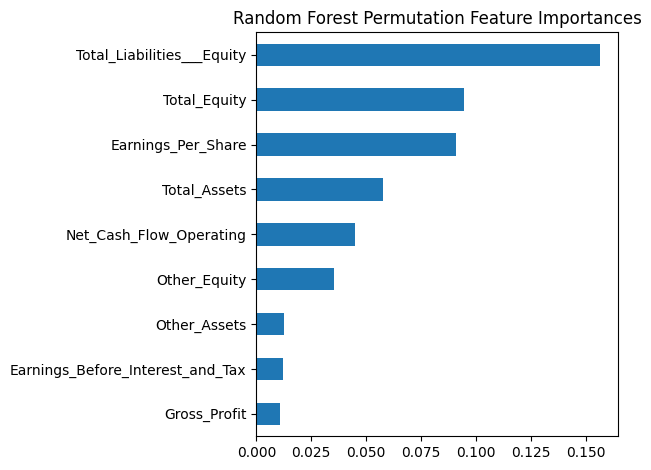

In [14]:
px = permutation_importances[permutation_importances > 0.01].sort_values(ascending=True).plot.barh()
px.set_title("Random Forest Permutation Feature Importances")
px.figure.tight_layout()

In [15]:
mdi_importances = pd.Series(regr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
mdi_importances

Total_Liabilities___Equity    0.178818
Total_Equity                  0.173337
Total_Assets                  0.116929
Net_Cash_Flow_Operating       0.063686
Earnings_Per_Share            0.054056
                                ...   
Total_Revenue                 0.001115
Current_Ratio                 0.001084
Liabilities                   0.000721
Accounts_Receivable           0.000668
Pre_Tax_Margin                0.000647
Length: 74, dtype: float64

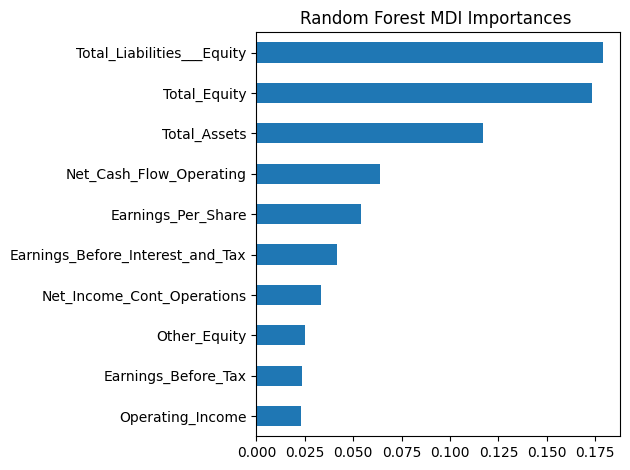

In [16]:
ax = mdi_importances[mdi_importances > 0.02].sort_values(ascending=True).plot.barh()
ax.set_title("Random Forest MDI Importances ")
ax.figure.tight_layout()

#### **Lasso Regression**
- Lasso Regression OOS sample MSE: `1.4512540588251194e+17`
- With min split 3 Random Forest OOS MSE `8.581209e+16` (n_est = 100 by default)
- Since the MSE's for random forest regressors are less compared to that of Lasso, Random Forest is a better model in our case.

In [17]:
#Find best alpha through cross-validation
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=None, cv=5, random_state=0)
lasso_cv.fit(X_train, y_train)
print(f"Best alpha: {lasso_cv.alpha_}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.416817658472038e+16, tolerance: 7.035094159969891e+16
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.461635488687718e+16, tolerance: 7.035094159969891e+16
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.047716628532265e+17, tolerance: 7.035094159969891e+16
  model

Best alpha: 3.5897132190806396e+16


In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score

#Fit lasso and predict treatment variable and store it in another variable 
lasso = Lasso(alpha=lasso_cv.alpha_)
model= lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
# r2 = r2_score(y_train, y_train_pred)
print("In sample MSE:", mse)
print("In sample RMSE:", rmse)
# print("In sample R^2:", r2)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("\nOOS sample MSE:", mse)
print("OOS sample RMSE:", rmse)

In sample MSE: 2.050801027441036e+17
In sample RMSE: 452857706.9501011

OOS sample MSE: 1.4512540588251194e+17
OOS sample RMSE: 380953285.695913


In [19]:
print("Lasso coefficients:", lasso_cv.coef_)

Lasso coefficients: [-0.00877981 -0.         -0.          0.          0.          0.02459361
 -0.          0.00586532 -0.         -0.         -0.00215216 -0.
 -0.         -0.00936506 -0.          0.          0.         -0.
  0.         -0.00113853  0.         -0.          0.0098884   0.
 -0.         -0.         -0.          0.03014261 -0.          0.00965317
 -0.00911046 -0.          0.          0.00164862  0.          0.
 -0.0373165   0.00086057  0.01403039  0.          0.00047827  0.
 -0.01462351  0.          0.          0.          0.02535663  0.
  0.          0.         -0.         -0.         -0.0011156   0.
 -0.          0.          0.          0.         -0.          0.0558152
 -0.00017019  0.          0.          0.05379722  0.05339402  0.
  0.00674052  0.          0.01645183 -0.          0.          0.
  0.         -0.        ]


#### **Part 2 - Decision Tree Classification**
- Dataset : cancer.csv | Breast Cancer Diagnosis
- Dataset Description :The Breast Cancer Dataset contains features computed from a digitized image of a fine needle aspirate of a breast mass.
- Problem Statement : The goal is to classify whether cancer is malignant or benign.

In [20]:
# Importing os library to change my current working directory to a new folder created for homework 2
import os
os.chdir('/Users/sumashreejavaji/PycharmProjects/BAX_452_Machine Learning/HW_2') # setting cwd to a new path
os.getcwd() # checking my environment's current working directory

# Loading the data
cancer_df = pd.read_csv("Cancer.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
from sklearn.model_selection import train_test_split

cancer_df=cancer_df.drop(columns=['Unnamed: 32','id'])

#Split the data into testing and training data
X = cancer_df.drop(['diagnosis'], axis=1)
y = cancer_df['diagnosis']

# train, test = train_test_split(SEC_df, train_size=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

Cancer_diagnosis_clf = DecisionTreeClassifier(random_state=60)
Cancer_diagnosis_clf.fit(X_train, y_train)

# Make predictions
y_pred = Cancer_diagnosis_clf.predict(X_test)


#### **Confusion Matrix**
- RF has correctly classified 100 Benign(0) cases ; mis-classified 8 Benign(0) cases as Malignant 
- RF has correctly classified 59  Malignant(1) cases ; mis-classified 4 Malignant (1) cases as Benign

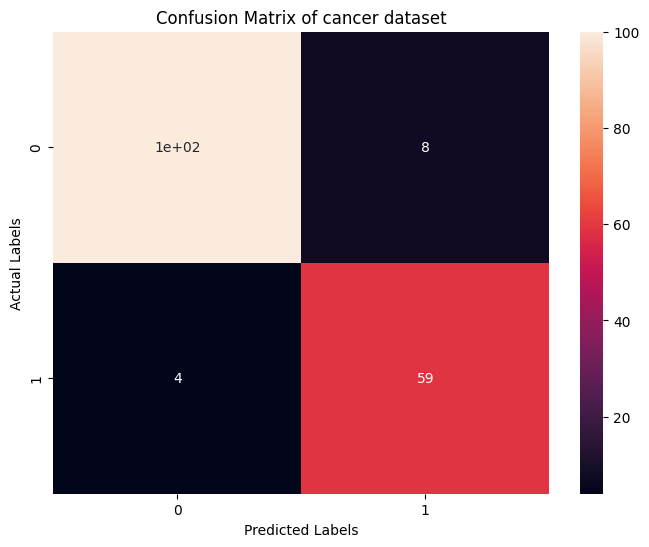

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of cancer dataset')
plt.show()

In [24]:
# Calculate accuracy of the Confusion Matrix
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [25]:
# calculate the accuracy from the RF y_pred vs y
# both the ways will give us the same results 
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9298


#### **Visualize the tree & decisons (variables in the plot)**
- As per the RF, concave_points_mean is the most important predictor in diagnosing cancer cells, as it is choosen as the root node of the tree
- radius_worst
- radius_se
- texture_mean
- compactness_mean
- symmetry_mean
- smoothness_se
- texture_worst
- area_worst
- smoothness_worst
- fractal_dimension_worst

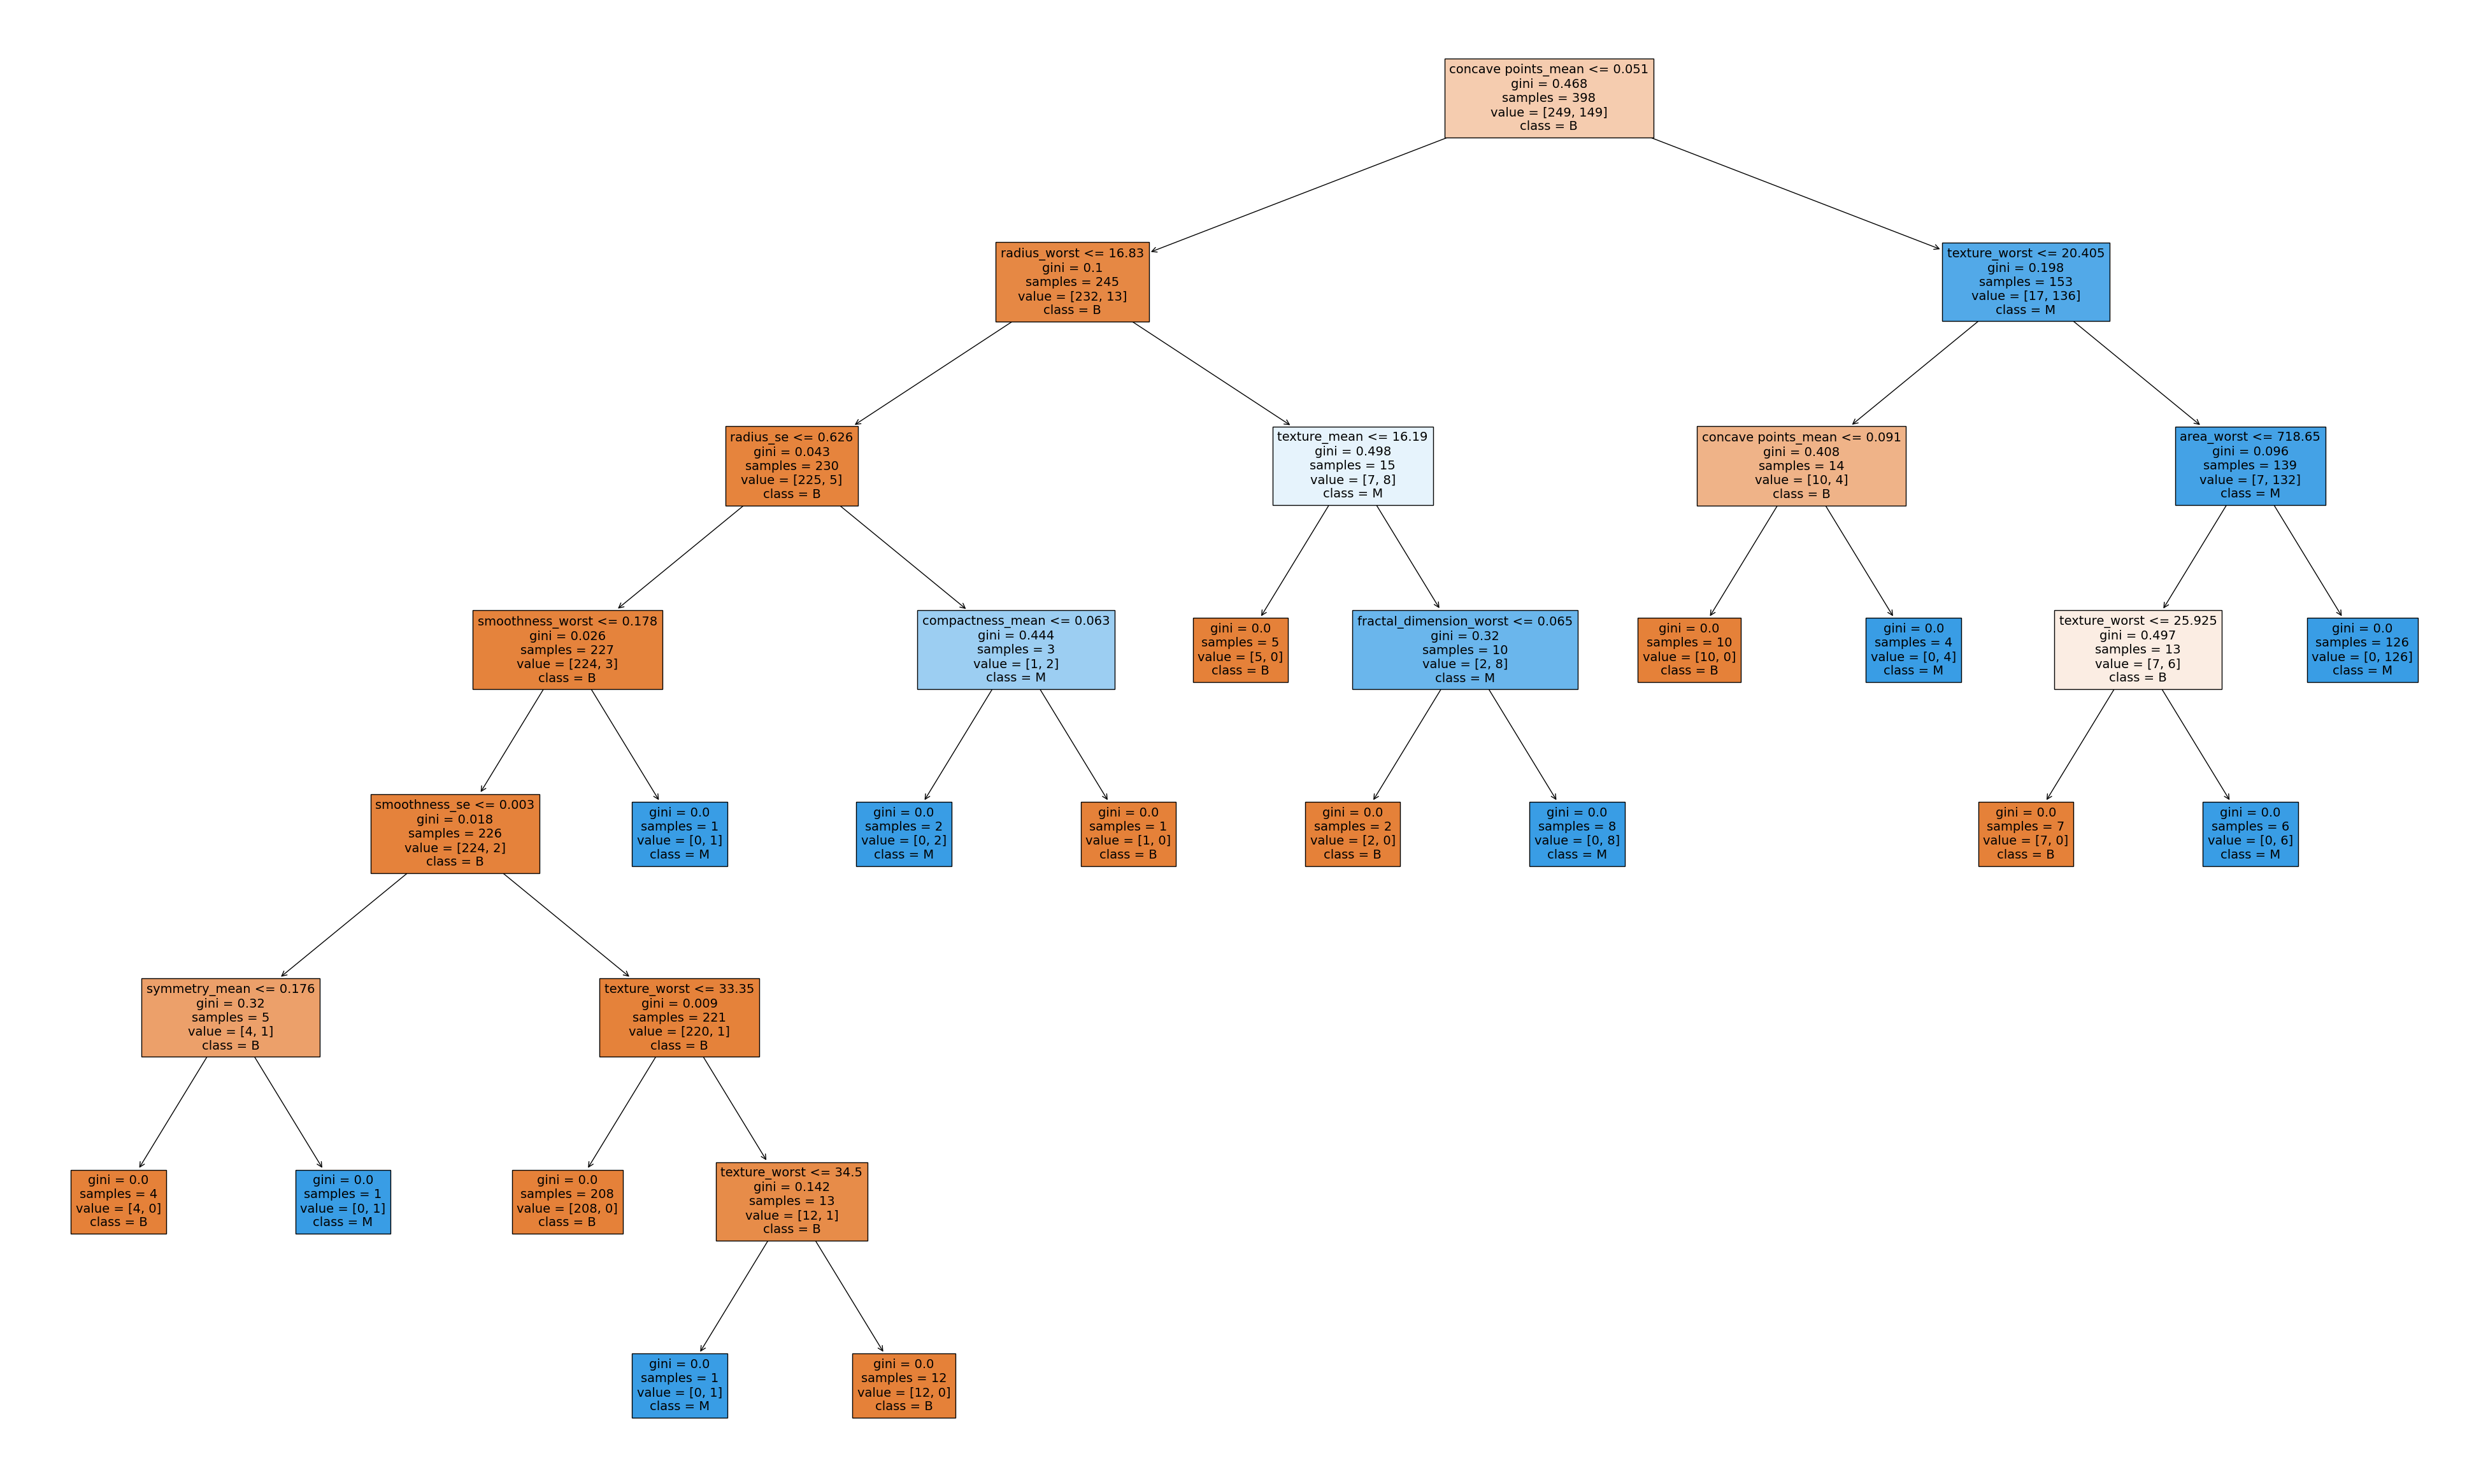

In [26]:
from sklearn.tree import plot_tree

class_names = np.unique(y_test)
plt.figure(figsize=(50, 30))
plot_tree(Cancer_diagnosis_clf, feature_names=X_train.columns,class_names=class_names,filled=True)
plt.show()

#### **Pruning**
- `Pruning` is a technique used in machine learning to reduce the size of decision trees by removing non-critical and redundant sections. It improves predictive accuracy by reducing overfitting.
- Use `k-fold cross-validation` to evaluate the performance of the decision tree with different pruning strategies. This helps in finding the optimal pruning strategy that generalizes well to unseen data.
- We can utilize the findings obtained from the above Feature Importance Analysis to prune features having low importance scores, thereby minimizing the impact on predictive performance
- Visualising the Tree : From looking at the above decision tree, we can say that it is overfitting at few splits, as the resulting split has low number of samples in them. I would prune the tree wherever the child nodes have samples 'less than equal to 3'
    - `Where` left side of the parent node looks fine ; right side needs some pruning
    - fractal_dimension_worst<=0.065
    - compactness_mean<=0.063
    - smoothness_worst<0.178
    - symmetry_mean<0.176
    - texture_worst<34.5

In [27]:
feature_importances = Cancer_diagnosis_clf.feature_importances_
column_names = list(X_train.columns)

# Print the columns along with their importances
# I copied this output & used regexp in editor to clean up columns with 0.0 and list out the columns with non zero importance (find ".*0\.0\n" (and) "\:.*" replace with '')
# which will result in all the columns used in the decision tree

for feature_name, importance in zip(column_names, feature_importances):
    print(f"{feature_name}: {importance}")

radius_mean: 0.0
texture_mean: 0.022885277126402707
perimeter_mean: 0.0
area_mean: 0.0
smoothness_mean: 0.0
compactness_mean: 0.007151649102000844
concavity_mean: 0.0
concave points_mean: 0.7364884884620587
symmetry_mean: 0.008581978922401012
fractal_dimension_mean: 0.0
radius_se: 0.013562586797775493
texture_se: 0.0
perimeter_se: 0.0
area_se: 0.0
smoothness_se: 0.0020041685450463763
compactness_se: 0.0
concavity_se: 0.0
concave points_se: 0.0
symmetry_se: 0.0
fractal_dimension_se: 0.0
radius_worst: 0.03953681645746331
texture_worst: 0.1054803582712466
perimeter_worst: 0.0
area_worst: 0.036652696366148256
smoothness_worst: 0.010492022104654618
compactness_worst: 0.0
concavity_worst: 0.0
concave points_worst: 0.0
symmetry_worst: 0.0
fractal_dimension_worst: 0.017163957844802024
